# Búsqueda de raíces de ecuaciones no lineales con SciPy

In [2]:
import numpy as np

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt

Visto cómo resolver sistemas de ecuaciones lineales, tal vez sea incluso más atractivo resolver ecuaciones no lineales. Para ello, importaremos el paquete `optimize` de SciPy:

In [4]:
from scipy import optimize

La ayuda de este paquete es bastante extensa (podemos consultarla en [scipy optimize](http://docs.scipy.org/doc/scipy/reference/tutorial/optimize.html). El paquete `optimize` incluye multitud de métodos para **optimización**, **ajuste de curvas** y **búsqueda de raíces**. Vamos a centrarnos ahora en la búsqueda de raíces de funciones escalares. Para más información podemos leer [pybonacci python scipy](http://pybonacci.org/2012/10/25/como-resolver-ecuaciones-algebraicas-en-python-con-scipy/).

Hay básicamente dos tipos de algoritmos para hallar raíces de ecuaciones no lineales:

* Aquellos que operan en un intervalo $[a, b]$ tal que $f(a) \cdot f(b) < 0$. Más lentos, convergencia asegurada.
* Aquellos que operan dando una condición inicial $x_0$ más o menos cerca de la solución. Más rápidos, convergencia condicionada.

De los primeros vamos a usar la función `brentq` (aunque podríamos usar `bisect`) y de los segundos vamos a usar `newton` (que en realidad engloba los métodos de Newton y de la secante).

**Ejemplo**:

$\ln{x} = \sin{x} \Rightarrow F(x) \equiv \ln{x} - \sin{x} = 0$

En primer lugar debemos definir la ecuación, que matemáticamente será una función $F(x)$ que deseamos igualar a cero.

In [5]:
def F(x):
    return np.log(x) - np.sin(x)

Para hacernos una idea de las posibles soluciones es conveniente representar gráficamente esa función:

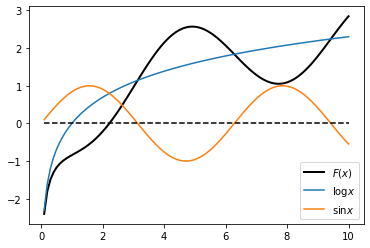

In [6]:
x = np.linspace(0.1, 10, num=100)
plt.plot(x, F(x), 'k', lw=2, label="$F(x)$")
plt.plot(x, np.log(x), label="$\log{x}$")
plt.plot(x, np.sin(x), label="$\sin{x}$")
plt.plot(x, np.zeros_like(x), 'k--')
plt.legend(loc=4)

Utilizando por ejemplo el método de Brent en el intervalo $[0, 3]$:

In [9]:
optimize.brentq(F, 1, 3)

2.2191071489134444

<div class="alert alert-warning">¿No habíamos dicho que en Python no se puede dividir por cero? Observemos esto:</div>

In [10]:
1 / 0

ZeroDivisionError: division by zero

In [14]:
1 / np.array([1e9999999])

array([0.])

<div class="alert alert-warning">Si manejamos arrays de NumPy las operaciones siguen las reglas dadas en el estándar de punto flotante (IEEE 754). Las divisiones por cero resultan en infinito, 0 / 0 es NaN, etc.</div>

### Ejercicio

Obtener por ambos métodos (`newton` y `brentq`) una solución a la ecuación $\tan{x} = x$ distinta de $x = 0$. Visualizar el resultado.

### Argumentos extra

Nuestras funciones siempre tienen que tomar como primer argumento la incógnita. Si queremos incluir más, tendremos que usar el argumento `args` de la funciones de búsqueda de raíces. Este patrón se usa también en otras partes de SciPy, como ya veremos.

Vamos a resolver ahora una ecuación que depende de un parámetro:

$$\sqrt{x} + \log{x} = C$$.

In [16]:
def G(x, C):
    return C - np.sqrt(x) - np.log(x)

**Nuestra incógnita sigue siendo $x$**, así que debe ir en primer lugar. El resto de los parámetros van a continuación, y sus valores se especifican a la hora de resolver la ecuación usando `args`:

In [18]:
optimize.newton(G, 8.0, args=(5,))

8.309432694231552

### Flujo compresible

La siguiente expresion nos permite conocer la distribución del número de Mach $M(x)$ a lo largo de un conducto de área $A(x)$:

$$ \frac{A(x)}{A^*} = \frac{1}{M(x)} \left( \frac{2}{1 + \gamma} \left( 1 + \frac{\gamma - 1}{2} M(x)^2 \right) \right)^{\frac{\gamma + 1}{2 (\gamma - 1)}}$$

Para un conducto convergente tal que

$$ \frac{A(x)}{A^*} = 3 - 2 x \quad x \in [0, 1]$$

hallar el número de Mach en la sección $x = 0.9$.

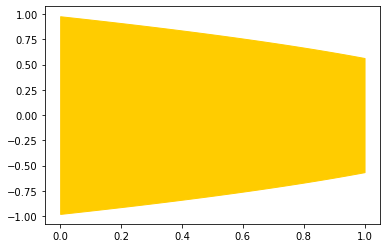

In [21]:
def A(x):
    return 3 - 2 * x

x = np.linspace(0, 1)
area = A(x)
r = np.sqrt(area / np.pi)
plt.fill_between(x, r, -r, color="#ffcc00")

¿Cuál es la función $F$ ahora? Hay dos opciones: definir una función $F_{0.9}(M)$ que nos da el número de Mach en la sección $0.9$ o una función $F(M, x)$ con la que podemos hallar el número de Mach en cualquier sección. Vamos por la segunda opción :)

Para resolver la ecuación utilizamos el método de Brent (bisección). ¿En qué intervalo se encontrará la solución? ¡A fin de hacernos una idea podriamos graficar la función $F$!

In [24]:
def F(M, x, g):
    return A(x) - (1 / M) * ((2 / (1 + g)) * (1 + (g - 1) / 2 * M ** 2)) ** ((g + 1) / (2 * (g - 1))) 

In [25]:
optimize.brentq(F, 0.01, 1, args=(0.9, 1.4))

0.5902487609888621

In [1]:
# Esta celda da el estilo al notebook
from IPython.core.display import HTML
css_file = '../styles/aeropython.css'
HTML(open(css_file, "r").read())